In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [4]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df['Score'] = df['Score'].str.split('/').str[0].str.strip().astype(int)

In [9]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4
...,...,...,...
144,AI_ELITE_4,uid_5,4
145,AI_ELITE_4,uid_4,4
146,AI_ELITE_4,uid_3,4
147,AI_ELITE_4,uid_2,3


In [10]:
stats = df.groupby('Batch')['Score'].describe()

In [11]:
stats

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


In [12]:
batch_summary = df.groupby('Batch')['Score'].agg(['mean', 'median', 'std', 'count']).reset_index()

In [13]:
batch_summary

,Batch,mean,median,std,count
0,AI_ELITE_4,3.791667,4.0,1.443376,48
1,AI_ELITE_6,4.229167,4.0,1.640441,48
2,AI_ELITE_7,5.056604,5.0,1.446682,53


In [14]:
modes = df.groupby('Batch')['Score'].apply(lambda x: x.mode().iloc[0]).reset_index()

In [15]:
modes.columns = ['Batch', 'mode']

In [16]:
modes

,Batch,mode
0,AI_ELITE_4,4
1,AI_ELITE_6,5
2,AI_ELITE_7,6


In [17]:
batch_summary = batch_summary.merge(modes, on='Batch')

In [18]:
batch_summary

,Batch,mean,median,std,count,mode
0,AI_ELITE_4,3.791667,4.0,1.443376,48,4
1,AI_ELITE_6,4.229167,4.0,1.640441,48,5
2,AI_ELITE_7,5.056604,5.0,1.446682,53,6


In [19]:
def categorize_score(score):
    if score <= 2: return 'Poor (0-2)'
    elif score <= 4: return 'Average (3-4)'
    elif score <= 6: return 'Good (5-6)'
    else: return 'Excellent (7)'

df['Performance'] = df['Score'].apply(categorize_score)

In [20]:
df

,Batch,User_ID,Score,Performance
0,AI_ELITE_7,uid_149,6,Good (5-6)
1,AI_ELITE_7,uid_148,6,Good (5-6)
2,AI_ELITE_7,uid_147,7,Excellent (7)
3,AI_ELITE_7,uid_146,7,Excellent (7)
4,AI_ELITE_7,uid_145,4,Average (3-4)
...,...,...,...,...
144,AI_ELITE_4,uid_5,4,Average (3-4)
145,AI_ELITE_4,uid_4,4,Average (3-4)
146,AI_ELITE_4,uid_3,4,Average (3-4)
147,AI_ELITE_4,uid_2,3,Average (3-4)


In [21]:
perf_dist = df.groupby(['Batch', 'Performance']).size().unstack(fill_value=0)

In [22]:
perf_dist

Performance,Average (3-4),Excellent (7),Good (5-6),Poor (0-2)
Batch,,,,
AI_ELITE_4,27,3,9,9
AI_ELITE_6,20,5,17,6
AI_ELITE_7,17,10,24,2


In [23]:
perf_dist_pct = perf_dist.div(perf_dist.sum(axis=1), axis=0) * 100

In [24]:
perf_dist_pct

Performance,Average (3-4),Excellent (7),Good (5-6),Poor (0-2)
Batch,,,,
AI_ELITE_4,56.250000,6.250000,18.750000,18.750000
AI_ELITE_6,41.666667,10.416667,35.416667,12.500000
AI_ELITE_7,32.075472,18.867925,45.283019,3.773585


In [25]:
group4 = df[df['Batch'] == 'AI_ELITE_4']['Score']
group6 = df[df['Batch'] == 'AI_ELITE_6']['Score']
group7 = df[df['Batch'] == 'AI_ELITE_7']['Score']

In [29]:
f_stat, p_val = stats.f_oneway(group4, group6, group7)

In [30]:
f_stat

9.194085228606145

In [31]:
p_val

0.00017346323549509007

In [32]:
high_scorers = df[df['Score'] >= 5].groupby('Batch').size() / df.groupby('Batch').size() * 100

In [33]:
high_scorers

Batch
AI_ELITE_4    25.000000
AI_ELITE_6    45.833333
AI_ELITE_7    64.150943
dtype: float64

In [34]:
sns.set(style="whitegrid")

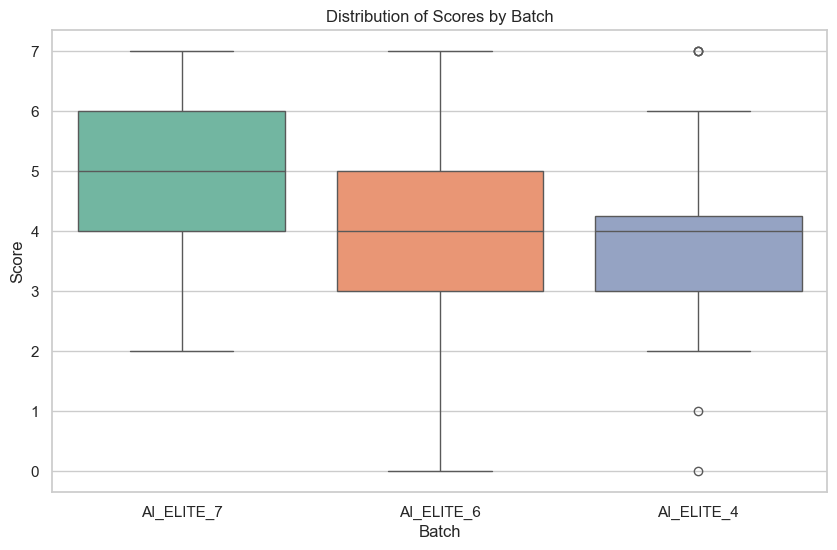

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Score', data=df, palette='Set2')
plt.title('Distribution of Scores by Batch')
plt.show()

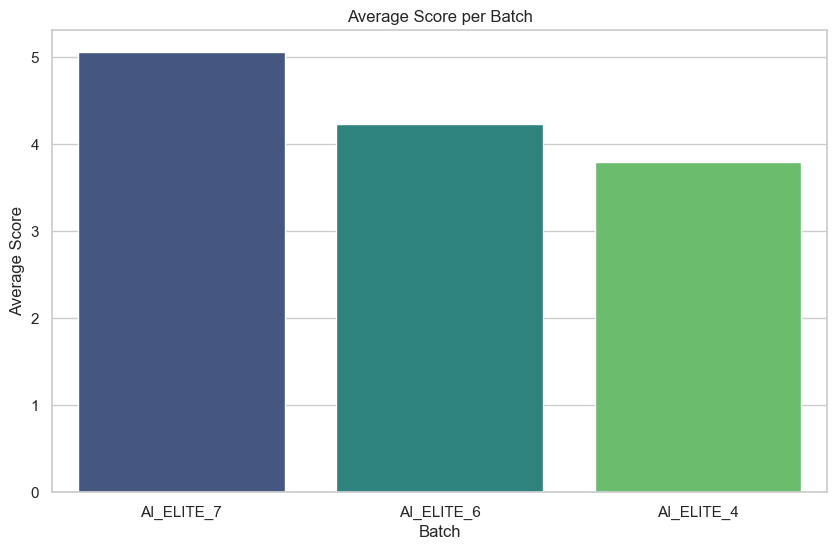

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Batch', y='Score', data=df, estimator='mean', palette='viridis', ci=None)
plt.title('Average Score per Batch')
plt.ylabel('Average Score')
plt.show()

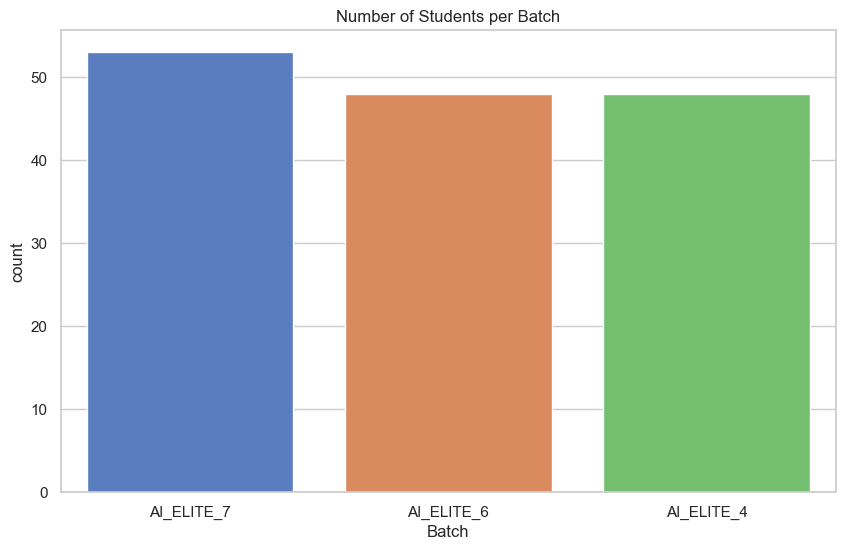

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Batch', data=df, palette='muted')
plt.title('Number of Students per Batch')
plt.show()

Text(0.5, 0.98, 'Score Distribution per Batch')

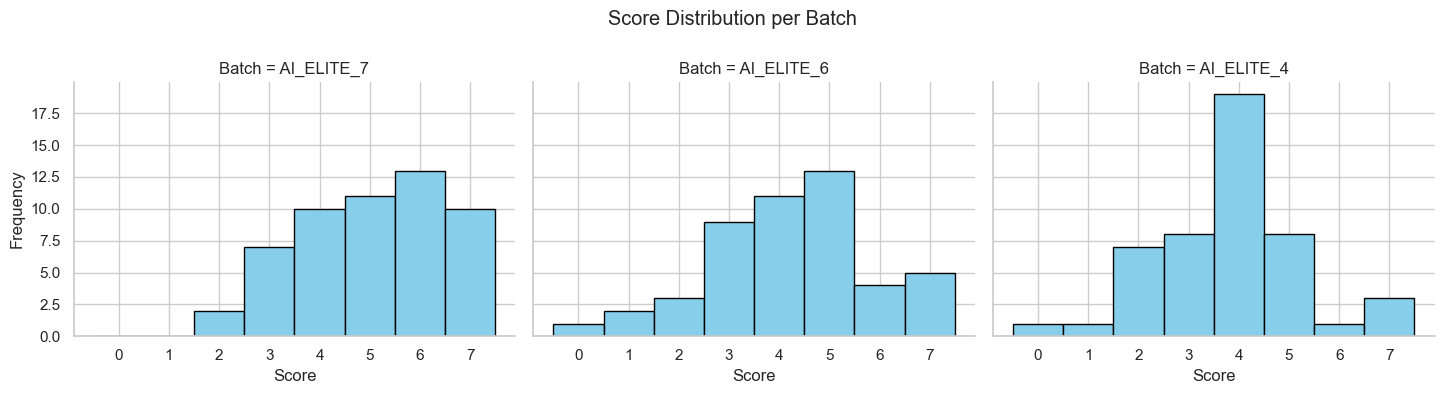

In [38]:
g = sns.FacetGrid(df, col="Batch", height=4, aspect=1.2)
g.map(plt.hist, "Score", bins=range(0, 9), color='skyblue', edgecolor='black', align='left')
g.set_axis_labels("Score", "Frequency")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Score Distribution per Batch')

<Figure size 1000x600 with 0 Axes>

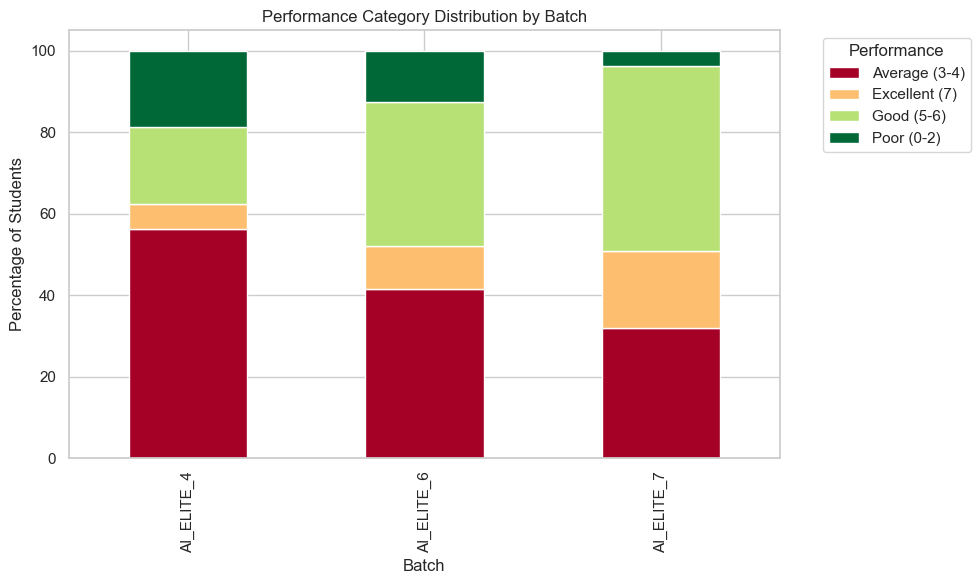

In [39]:
plt.figure(figsize=(10, 6))
perf_dist_pct.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(10, 6))
plt.title('Performance Category Distribution by Batch')
plt.ylabel('Percentage of Students')
plt.xlabel('Batch')
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Text(0.5, 1.0, 'Score Density and Distribution per Batch')

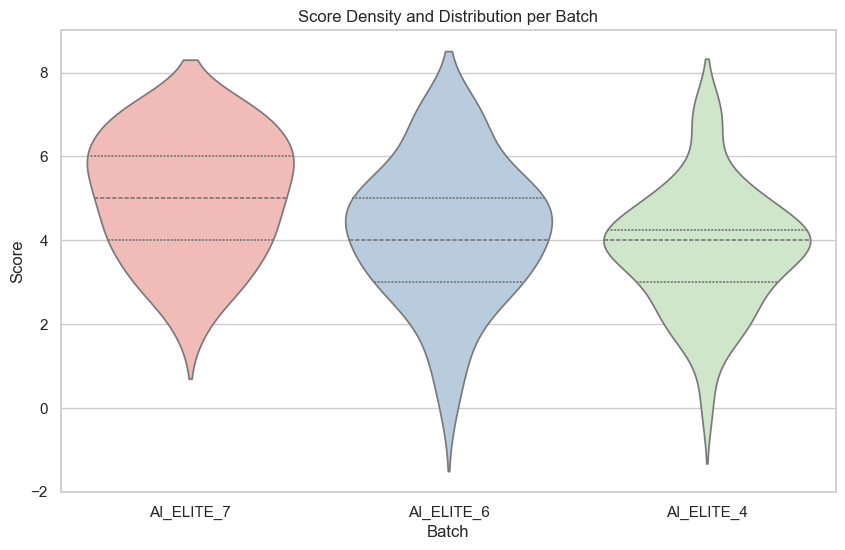

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Batch', y='Score', data=df, inner='quartile', palette='Pastel1')
plt.title('Score Density and Distribution per Batch')

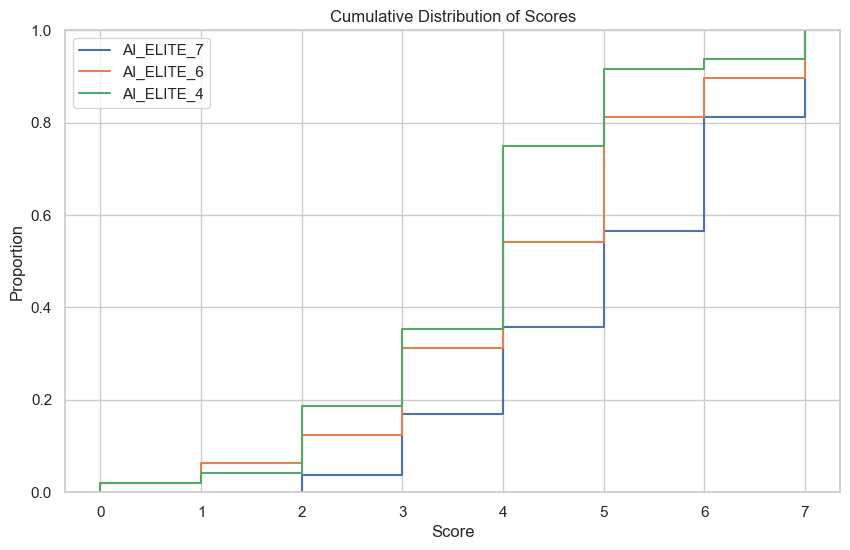

In [41]:
plt.figure(figsize=(10, 6))
for batch in df['Batch'].unique():
    subset = df[df['Batch'] == batch]
    sns.ecdfplot(subset['Score'], label=batch)
plt.title('Cumulative Distribution of Scores')
plt.legend()

## Based on the analysis of the scores_data.csv file, here are the key insights and descriptive statistics for the three batches: AI_ELITE_4, AI_ELITE_6, and AI_ELITE_7.

# Key Insights
### Top Performing Batch (AI_ELITE_7):

## Highest Average: AI_ELITE_7 is clearly the best-performing batch with an average score of 5.06/7, significantly higher than the other two batches.

## Better Consistency: The minimum score in this batch is 2, whereas the other two batches have students scoring 0.

## Positive Skew: The mode (most frequent score) for this batch is 6, indicating that a large portion of students are scoring near the top range.

## Most Improved/Intermediate Batch (AI_ELITE_6):

## This batch sits in the middle with an average score of 4.23.

## High Variability: It has the highest standard deviation (1.64), meaning there is a wider gap between the top performers and the struggling students compared to the other groups.

## Lowest Scoring Batch (AI_ELITE_4):

## This batch has the lowest mean score of 3.79.

## The median and mode are both 4, suggesting that the average student in this batch scores around the middle of the range, but there are more lower scores pulling the average down compared to AI_ELITE_6 and 7.

## Student Distribution:

## The enrollment is fairly balanced, though AI_ELITE_7 is the largest batch with 53 students, while the other two have 48 students each.

# Visualizations Summary
## Boxplots: Show that the interquartile range (IQR) for AI_ELITE_7 is shifted significantly higher than AI_ELITE_4 and AI_ELITE_6.

## Histograms: Reveal that while AI_ELITE_4 and 6 have a more normal distribution centered around 4, AI_ELITE_7's distribution is skewed towards the higher scores (6 and 7).

# Performance Category Breakdown
## I categorized students into four groups based on their scores: Poor (0-2), Average (3-4), Good (5-6), and Excellent (7).

# AI_ELITE_7 has a massive concentration of high performers, with over 64% of the batch scoring in the "Good" or "Excellent" categories.

# AI_ELITE_4 is dominated by "Average" performers, with more than half the batch scoring 3 or 4. It also has the highest percentage of "Poor" scores (18.75%).

# Statistical Significance (ANOVA Test)
### To determine if the differences in mean scores are just due to chance or are statistically significant, we performed a One-Way ANOVA test:

# F-statistic: 9.194

# p-value: 0.000173

# Conclusion: Since the p-value is much lower than 0.05, the difference in performance between these batches is statistically significant. This suggests that the variations in scores are likely due to differences in batch characteristics, teaching, or student intake rather than random fluctuations.

# "High Scorer" Looking at the percentage of students who scored a 5 or higher:AI_ELITE_4: Only 25% of students reached this threshold.AI_ELITE_6: 45.8% of students reached this threshold.AI_ELITE_7: 64.2% of students reached this threshold.